Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Graphviz import ( for higher quality tree visualization)
import graphviz

# Configure settings
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported.")

Libraries imported.


Load and Inspect Data

In [4]:
# Load the dataset
file_path = 'heart.csv' 
df = pd.read_csv(file_path)

# Basic Inspection
print("Dataset Information:\n")
df.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
print("\nFirst 5 Rows:")
display(df.head())


First 5 Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.900,1,3,2,0


In [7]:
print("Target Variable Distribution (target: 0=No disease, 1=Disease):")
print(df['target'].value_counts())
print(f"\nPercentage of Disease cases (Class 1): {df['target'].mean() * 100:.2f}%") # Check balance

Target Variable Distribution (target: 0=No disease, 1=Disease):
target
1    526
0    499
Name: count, dtype: int64

Percentage of Disease cases (Class 1): 51.32%


In [8]:
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000
mean,54.434,0.696,0.942,131.612,246.000,0.149,0.530,149.114,0.337,1.072,1.385,0.754,2.324,0.513
std,9.072,0.460,1.030,17.517,51.593,0.357,0.528,23.006,0.473,1.175,0.618,1.031,0.621,0.500
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,48.000,0.000,0.000,120.000,211.000,0.000,0.000,132.000,0.000,0.000,1.000,0.000,2.000,0.000
50%,56.000,1.000,1.000,130.000,240.000,0.000,1.000,152.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,275.000,0.000,1.000,166.000,1.000,1.800,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


In [9]:
print("\nChecking for Missing Values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}") 


Checking for Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Total missing values: 0


In [11]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1) # All columns except target
y = df['target']             # Target variable

print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)
print("\nFeature names:", X.columns.tolist())

Shape of Features (X): (1025, 13)
Shape of Target (y): (1025,)

Feature names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


Train/Test Split

In [12]:
# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
print("--- Data Split Shapes ---")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

--- Data Split Shapes ---
X_train: (717, 13)
X_test: (308, 13)
y_train: (717,)
y_test: (308,)


Train a Basic Decision Tree Classifier

In [14]:
# Initialize the Decision Tree Classifier
# random_state ensures reproducibility
# No depth limit initially to see potential overfitting
dt_basic = DecisionTreeClassifier(random_state=42)

# Train the model
dt_basic.fit(X_train, y_train)

# Predict on the test set
y_pred_basic_dt = dt_basic.predict(X_test)

# Evaluate basic accuracy
accuracy_basic_dt = accuracy_score(y_test, y_pred_basic_dt)

In [15]:
print("--- Basic Decision Tree (Unpruned) ---")
print(f"Test Accuracy: {accuracy_basic_dt:.4f}")
# We expect this might be lower than training accuracy (sign of overfitting)
print(f"Train Accuracy: {accuracy_score(y_train, dt_basic.predict(X_train)):.4f}")

--- Basic Decision Tree (Unpruned) ---
Test Accuracy: 0.9805
Train Accuracy: 1.0000


Visualize the Decision Tree


--- Visualizing the Decision Tree (Limited Depth for Readability) ---


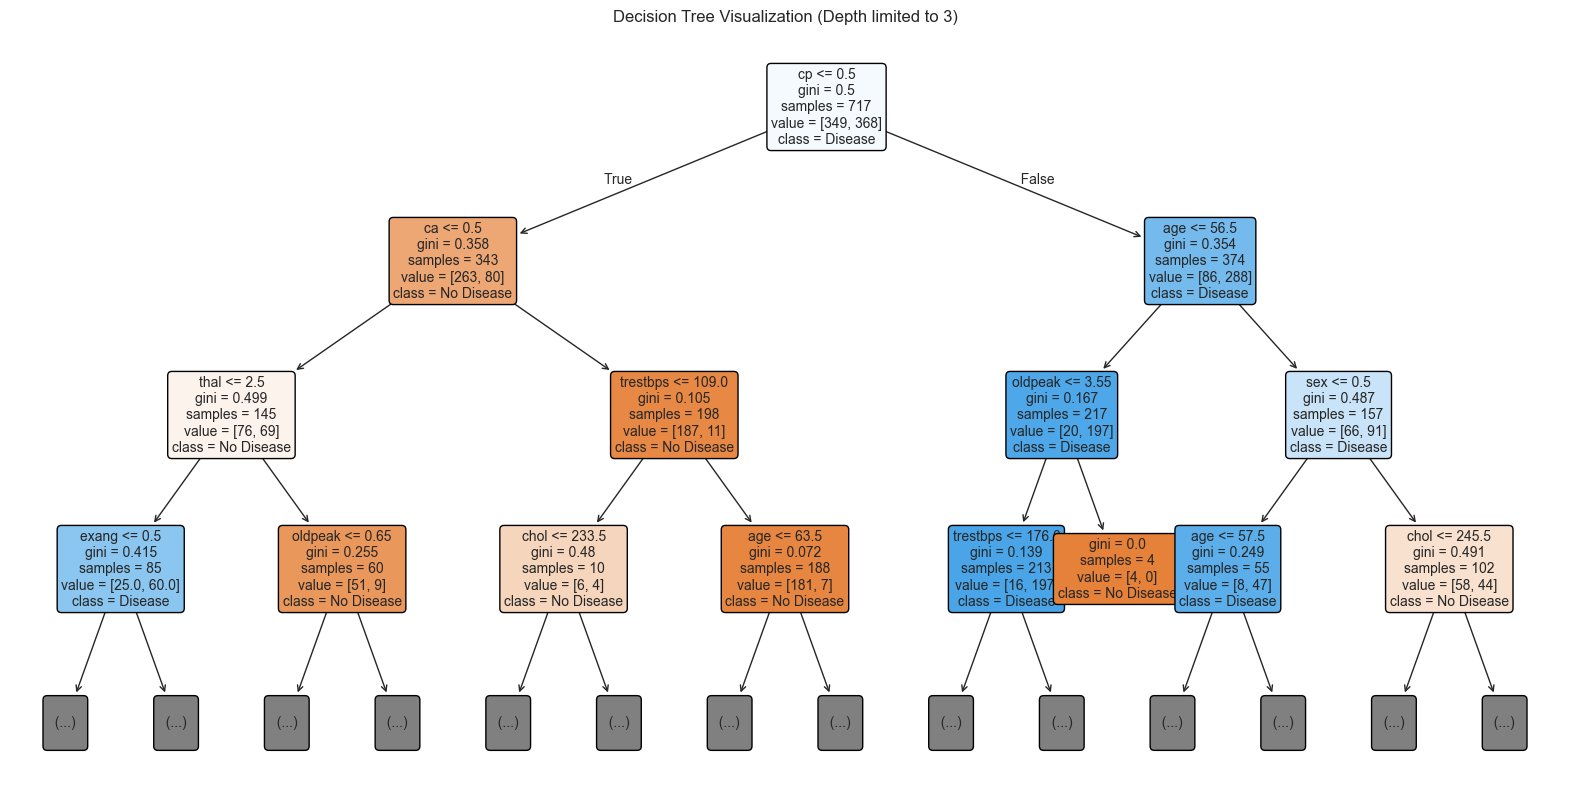

In [16]:
print("\n--- Visualizing the Decision Tree (Limited Depth for Readability) ---")

# --- Method 1: Using sklearn.tree.plot_tree (Good for smaller trees) ---
plt.figure(figsize=(20, 10)) # Adjust size as needed
plot_tree(dt_basic,
          filled=True, # Color nodes by majority class
          rounded=True, # Use rounded boxes
          feature_names=X.columns.tolist(), # Show feature names
          class_names=['No Disease', 'Disease'], # Show class names
          max_depth=3, # Limit depth for readability in the plot
          fontsize=10)
plt.title("Decision Tree Visualization (Depth limited to 3)")
plt.show()

Analyze Overfitting & Control Tree Depth

In [20]:
# Test different max_depth values to see effect on overfitting
max_depths = range(1, 15) # Test depths from 1 to 14
train_accuracies = []
test_accuracies = []

for depth in max_depths:
    # Train a tree with the current max_depth
    dt_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_depth.fit(X_train, y_train)

    # Record training accuracy
    train_acc = accuracy_score(y_train, dt_depth.predict(X_train))
    train_accuracies.append(train_acc)

    # Record testing accuracy
    test_acc = accuracy_score(y_test, dt_depth.predict(X_test))
    test_accuracies.append(test_acc)

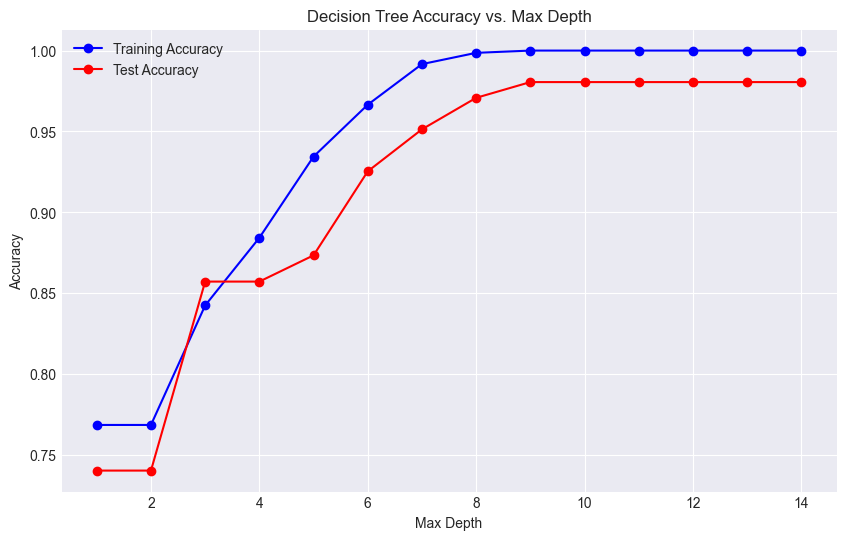

In [21]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, 'bo-', label='Training Accuracy')
plt.plot(max_depths, test_accuracies, 'ro-', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
print("--- Overfitting Analysis ---")
print("Observe the plot:")
print("- Training accuracy usually increases or stays high as depth increases.")
print("- Test accuracy often increases initially, peaks, and then might decrease or plateau.")
print("- A large gap between training and test accuracy indicates overfitting.")

--- Overfitting Analysis ---
Observe the plot:
- Training accuracy usually increases or stays high as depth increases.
- Test accuracy often increases initially, peaks, and then might decrease or plateau.
- A large gap between training and test accuracy indicates overfitting.


In [25]:
# Find the depth that gives a good balance (often where test accuracy peaks or starts to plateau)
best_depth_index = np.argmax(test_accuracies)
best_depth = max_depths[best_depth_index]
print(f"Best test accuracy ({test_accuracies[best_depth_index]:.4f}) achieved at max_depth = {best_depth}")

Best test accuracy (0.9805) achieved at max_depth = 9


Train and Evaluate a Pruned Decision Tree

In [26]:
# Train a decision tree with the potentially better max_depth found above
# Let's use the best_depth identified, or choose a reasonable value like 3 or 4 if the peak isn't clear
pruned_depth = best_depth 

print(f"\n--- Training Pruned Decision Tree (max_depth={pruned_depth}) ---")
dt_pruned = DecisionTreeClassifier(max_depth=pruned_depth, random_state=42)
dt_pruned.fit(X_train, y_train)


--- Training Pruned Decision Tree (max_depth=9) ---


DecisionTreeClassifier(max_depth=9, random_state=42)

In [27]:
# Evaluate the pruned tree
y_pred_pruned = dt_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
report_pruned = classification_report(y_test, y_pred_pruned, target_names=['No Disease', 'Disease'])
cm_pruned = confusion_matrix(y_test, y_pred_pruned)

In [28]:
print(f"Pruned Tree Test Accuracy: {accuracy_pruned:.4f}")
print("\nClassification Report (Pruned Tree):")
print(report_pruned)

Pruned Tree Test Accuracy: 0.9805

Classification Report (Pruned Tree):
              precision    recall  f1-score   support

  No Disease       0.96      1.00      0.98       150
     Disease       1.00      0.96      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308




Confusion Matrix (Pruned Tree):


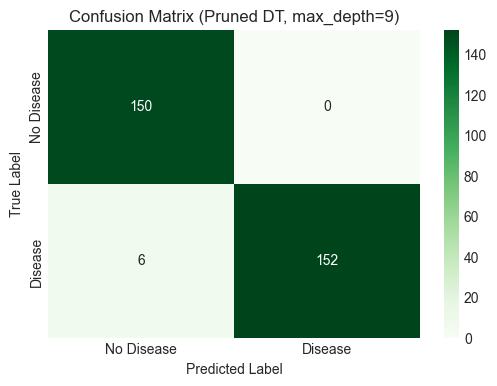

In [29]:
print("\nConfusion Matrix (Pruned Tree):")
plt.figure(figsize=(6, 4))
sns.heatmap(cm_pruned, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Pruned DT, max_depth={pruned_depth})')
plt.show()

Train a Random Forest Classifier

In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=pruned_depth)

In [31]:
# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [32]:
# Evaluate the Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=['No Disease', 'Disease'])
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [34]:
print("--- Random Forest Evaluation ---")
print(f"Random Forest Test Accuracy: {accuracy_rf:.4f}")
print(f"(Compare to Pruned DT Accuracy: {accuracy_pruned:.4f})")

print("\nClassification Report (Random Forest):")
print(report_rf)

--- Random Forest Evaluation ---
Random Forest Test Accuracy: 0.9805
(Compare to Pruned DT Accuracy: 0.9805)

Classification Report (Random Forest):
              precision    recall  f1-score   support

  No Disease       0.98      0.98      0.98       150
     Disease       0.98      0.98      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308




Confusion Matrix (Random Forest):


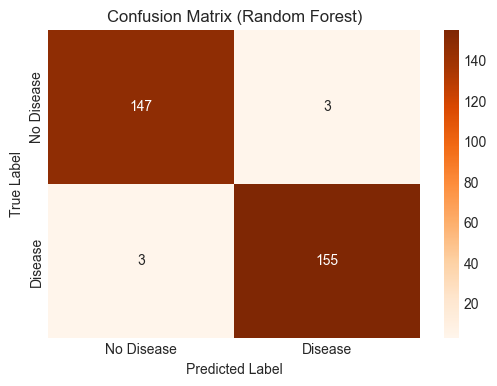

In [35]:
print("\nConfusion Matrix (Random Forest):")
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

Interpret Feature Importances

In [37]:
# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("--- Feature Importances (from Random Forest) ---\n")
print(importance_df)

--- Feature Importances (from Random Forest) ---

     Feature  Importance
2         cp       0.145
7    thalach       0.129
11        ca       0.119
12      thal       0.104
9    oldpeak       0.100
0        age       0.097
4       chol       0.074
3   trestbps       0.069
8      exang       0.066
10     slope       0.039
1        sex       0.032
6    restecg       0.018
5        fbs       0.009


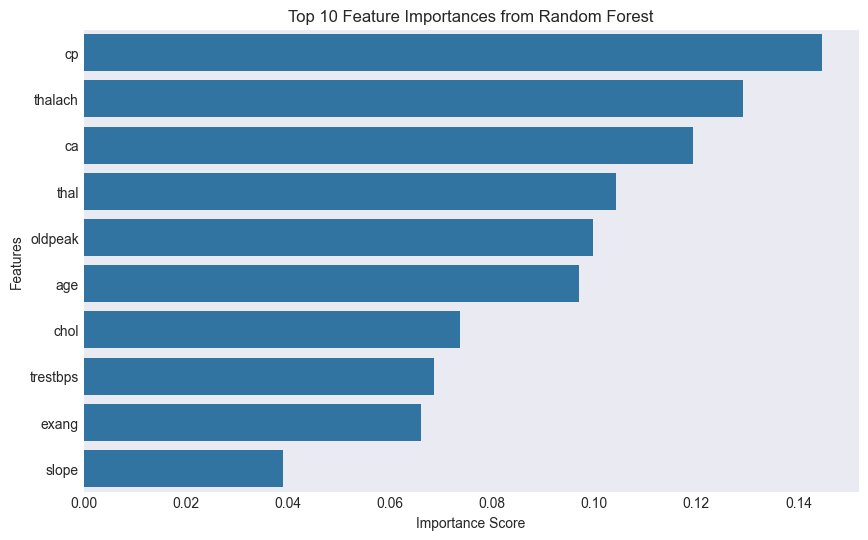

In [38]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10)) # Plot top 10
plt.title('Top 10 Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()

In [41]:
print("Interpretation: Features with higher scores contribute more, on average,to the decisions made by the trees in the Random Forest.")

Interpretation: Features with higher scores contribute more, on average,to the decisions made by the trees in the Random Forest.


Evaluate Using Cross-Validation

In [42]:
print("\n--- Cross-Validation Evaluation ---")

# Cross-validate the Pruned Decision Tree
cv_scores_dt = cross_val_score(dt_pruned, X, y, cv=5, scoring='accuracy')
print(f"Pruned Decision Tree CV Accuracy Scores: {cv_scores_dt}")
print(f"Pruned Decision Tree CV Mean Accuracy: {np.mean(cv_scores_dt):.4f}")
print(f"Pruned Decision Tree CV Std Dev Accuracy: {np.std(cv_scores_dt):.4f}")

# Cross-validate the Random Forest
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"\nRandom Forest CV Accuracy Scores: {cv_scores_rf}")
print(f"Random Forest CV Mean Accuracy: {np.mean(cv_scores_rf):.4f}")
print(f"Random Forest CV Std Dev Accuracy: {np.std(cv_scores_rf):.4f}")


--- Cross-Validation Evaluation ---
Pruned Decision Tree CV Accuracy Scores: [1.        1.        1.        0.9902439 1.       ]
Pruned Decision Tree CV Mean Accuracy: 0.9980
Pruned Decision Tree CV Std Dev Accuracy: 0.0039

Random Forest CV Accuracy Scores: [1.         1.         0.98536585 1.         0.98536585]
Random Forest CV Mean Accuracy: 0.9941
Random Forest CV Std Dev Accuracy: 0.0072


In [43]:
print("Comparison: Higher mean CV accuracy suggests better generalization.")
print("Lower standard deviation suggests more consistent performance across different data subsets.")

Comparison: Higher mean CV accuracy suggests better generalization.
Lower standard deviation suggests more consistent performance across different data subsets.
